## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.922259   546.019126  0.204475  4.681777  0.916405
1  62.492801   148.283743  0.772577  8.971882  1.077741
2  77.776321   337.027662  0.185227  9.366902  0.581260
3   4.230067   354.232269  0.551338  1.496080  1.502021
4  57.682645  1236.810728  0.932986  4.307982  1.551455


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9385539	total: 57.1ms	remaining: 57s
1:	learn: 0.9322833	total: 57.6ms	remaining: 28.7s
2:	learn: 0.9238999	total: 58.2ms	remaining: 19.4s
3:	learn: 0.9138454	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9060594	total: 59.2ms	remaining: 11.8s
5:	learn: 0.8990085	total: 59.8ms	remaining: 9.9s
6:	learn: 0.8913443	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8817259	total: 60.7ms	remaining: 7.53s
8:	learn: 0.8721309	total: 61.2ms	remaining: 6.74s
9:	learn: 0.8622172	total: 61.7ms	remaining: 6.11s
10:	learn: 0.8549865	total: 62.1ms	remaining: 5.59s
11:	learn: 0.8455080	total: 62.6ms	remaining: 5.15s
12:	learn: 0.8384309	total: 63.1ms	remaining: 4.79s
13:	learn: 0.8272368	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8187384	total: 64ms	remaining: 4.2s
15:	learn: 0.8118196	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8028349	total: 64.9ms	remaining: 3.75s
17:	learn: 0.7960523	total: 65.3ms	remaining: 3.56s
18:	learn: 0.7887317	total: 65.6ms	remaining: 3.39

106:	learn: 0.4186212	total: 107ms	remaining: 894ms
107:	learn: 0.4164762	total: 108ms	remaining: 890ms
108:	learn: 0.4130354	total: 108ms	remaining: 885ms
109:	learn: 0.4106117	total: 109ms	remaining: 880ms
110:	learn: 0.4077960	total: 109ms	remaining: 874ms
111:	learn: 0.4055567	total: 110ms	remaining: 869ms
112:	learn: 0.4027490	total: 110ms	remaining: 863ms
113:	learn: 0.4003891	total: 110ms	remaining: 857ms
114:	learn: 0.3981025	total: 111ms	remaining: 852ms
115:	learn: 0.3956181	total: 111ms	remaining: 846ms
116:	learn: 0.3924328	total: 111ms	remaining: 841ms
117:	learn: 0.3896296	total: 112ms	remaining: 836ms
118:	learn: 0.3872767	total: 112ms	remaining: 832ms
119:	learn: 0.3851853	total: 113ms	remaining: 827ms
120:	learn: 0.3830788	total: 113ms	remaining: 823ms
121:	learn: 0.3803440	total: 114ms	remaining: 819ms
122:	learn: 0.3781642	total: 114ms	remaining: 814ms
123:	learn: 0.3763010	total: 115ms	remaining: 810ms
124:	learn: 0.3741392	total: 115ms	remaining: 806ms
125:	learn: 

284:	learn: 0.1785169	total: 186ms	remaining: 467ms
285:	learn: 0.1778579	total: 187ms	remaining: 466ms
286:	learn: 0.1775484	total: 187ms	remaining: 465ms
287:	learn: 0.1769188	total: 187ms	remaining: 463ms
288:	learn: 0.1762266	total: 188ms	remaining: 462ms
289:	learn: 0.1752588	total: 188ms	remaining: 461ms
290:	learn: 0.1746513	total: 189ms	remaining: 460ms
291:	learn: 0.1740634	total: 189ms	remaining: 459ms
292:	learn: 0.1735683	total: 190ms	remaining: 457ms
293:	learn: 0.1729755	total: 190ms	remaining: 456ms
294:	learn: 0.1726801	total: 191ms	remaining: 455ms
295:	learn: 0.1722076	total: 191ms	remaining: 455ms
296:	learn: 0.1716231	total: 192ms	remaining: 454ms
297:	learn: 0.1709962	total: 192ms	remaining: 452ms
298:	learn: 0.1701875	total: 192ms	remaining: 451ms
299:	learn: 0.1698710	total: 193ms	remaining: 449ms
300:	learn: 0.1692563	total: 193ms	remaining: 448ms
301:	learn: 0.1689797	total: 194ms	remaining: 447ms
302:	learn: 0.1687157	total: 194ms	remaining: 446ms
303:	learn: 

504:	learn: 0.0972432	total: 290ms	remaining: 284ms
505:	learn: 0.0971328	total: 290ms	remaining: 283ms
506:	learn: 0.0966274	total: 291ms	remaining: 283ms
507:	learn: 0.0964407	total: 291ms	remaining: 282ms
508:	learn: 0.0963738	total: 291ms	remaining: 281ms
509:	learn: 0.0962658	total: 292ms	remaining: 280ms
510:	learn: 0.0958431	total: 292ms	remaining: 280ms
511:	learn: 0.0956602	total: 293ms	remaining: 279ms
512:	learn: 0.0952865	total: 293ms	remaining: 279ms
513:	learn: 0.0951820	total: 294ms	remaining: 278ms
514:	learn: 0.0946915	total: 294ms	remaining: 277ms
515:	learn: 0.0943201	total: 294ms	remaining: 276ms
516:	learn: 0.0940770	total: 295ms	remaining: 275ms
517:	learn: 0.0939013	total: 295ms	remaining: 275ms
518:	learn: 0.0935405	total: 296ms	remaining: 274ms
519:	learn: 0.0928831	total: 296ms	remaining: 273ms
520:	learn: 0.0927835	total: 297ms	remaining: 273ms
521:	learn: 0.0923096	total: 297ms	remaining: 272ms
522:	learn: 0.0921391	total: 298ms	remaining: 271ms
523:	learn: 

686:	learn: 0.0588250	total: 368ms	remaining: 168ms
687:	learn: 0.0587325	total: 369ms	remaining: 167ms
688:	learn: 0.0585112	total: 369ms	remaining: 167ms
689:	learn: 0.0581961	total: 370ms	remaining: 166ms
690:	learn: 0.0578709	total: 370ms	remaining: 166ms
691:	learn: 0.0578312	total: 371ms	remaining: 165ms
692:	learn: 0.0577417	total: 371ms	remaining: 164ms
693:	learn: 0.0577026	total: 372ms	remaining: 164ms
694:	learn: 0.0574360	total: 372ms	remaining: 163ms
695:	learn: 0.0573973	total: 372ms	remaining: 163ms
696:	learn: 0.0573092	total: 373ms	remaining: 162ms
697:	learn: 0.0572710	total: 373ms	remaining: 162ms
698:	learn: 0.0570280	total: 374ms	remaining: 161ms
699:	learn: 0.0567261	total: 374ms	remaining: 160ms
700:	learn: 0.0566600	total: 374ms	remaining: 160ms
701:	learn: 0.0563461	total: 375ms	remaining: 159ms
702:	learn: 0.0562811	total: 375ms	remaining: 159ms
703:	learn: 0.0562438	total: 376ms	remaining: 158ms
704:	learn: 0.0561796	total: 376ms	remaining: 157ms
705:	learn: 

934:	learn: 0.0332156	total: 471ms	remaining: 32.8ms
935:	learn: 0.0330656	total: 472ms	remaining: 32.2ms
936:	learn: 0.0330029	total: 472ms	remaining: 31.7ms
937:	learn: 0.0329876	total: 472ms	remaining: 31.2ms
938:	learn: 0.0328606	total: 473ms	remaining: 30.7ms
939:	learn: 0.0328455	total: 473ms	remaining: 30.2ms
940:	learn: 0.0328305	total: 474ms	remaining: 29.7ms
941:	learn: 0.0327934	total: 474ms	remaining: 29.2ms
942:	learn: 0.0327031	total: 475ms	remaining: 28.7ms
943:	learn: 0.0325427	total: 475ms	remaining: 28.2ms
944:	learn: 0.0325279	total: 476ms	remaining: 27.7ms
945:	learn: 0.0325133	total: 476ms	remaining: 27.2ms
946:	learn: 0.0323904	total: 476ms	remaining: 26.7ms
947:	learn: 0.0323760	total: 477ms	remaining: 26.2ms
948:	learn: 0.0323393	total: 477ms	remaining: 25.6ms
949:	learn: 0.0323231	total: 478ms	remaining: 25.1ms
950:	learn: 0.0321567	total: 478ms	remaining: 24.6ms
951:	learn: 0.0320137	total: 479ms	remaining: 24.1ms
952:	learn: 0.0319997	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

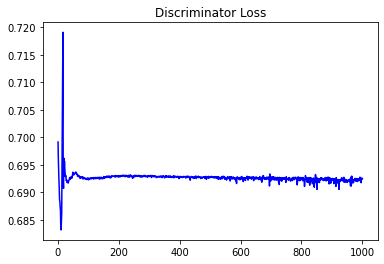

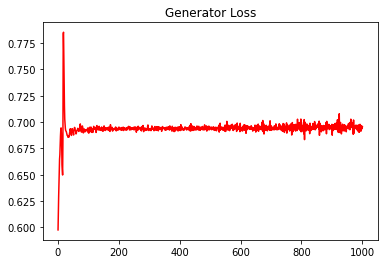

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2380024520619607


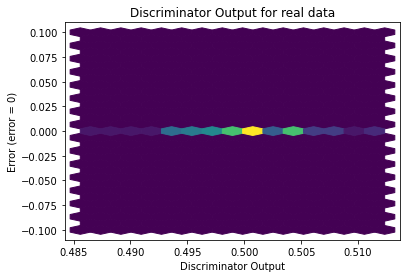

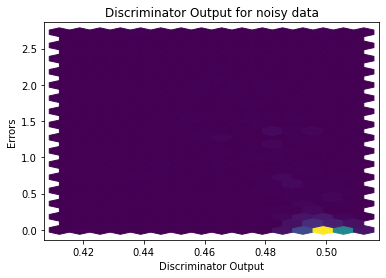

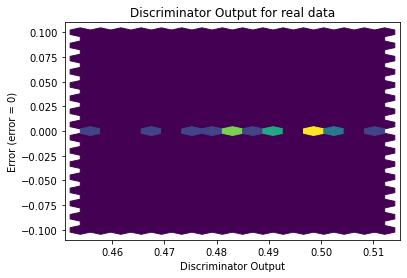

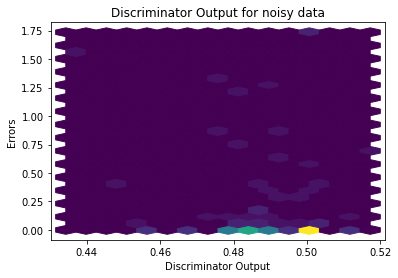

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


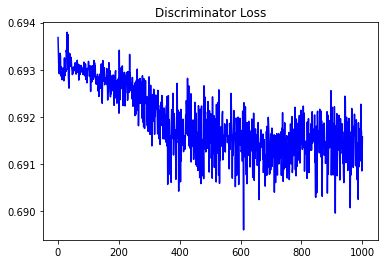

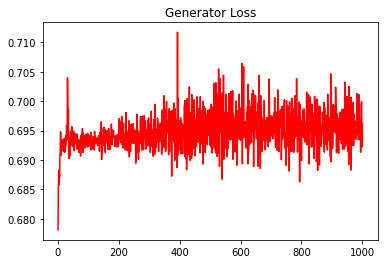

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2372919581141459


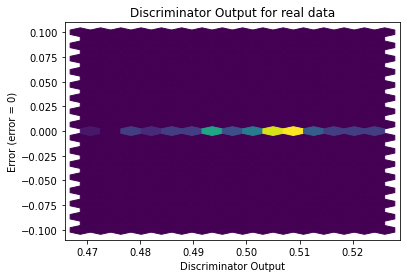

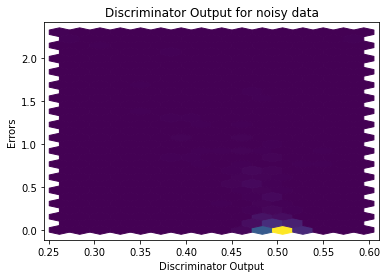

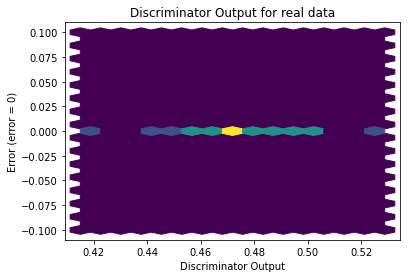

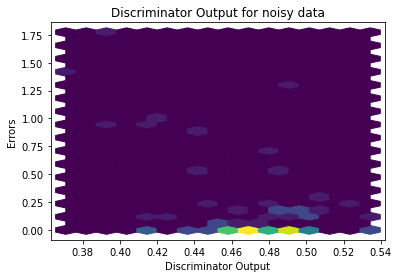

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2918]], requires_grad=True)
